# KNN Regrese a Rozhodovací hranice

## Cíl lekce

Po dokončení této lekce budete:
- **Rozumět rozdílu** mezi klasifikací a regresí
- **Umět použít KNN pro regresi** - předpovídat spojité hodnoty
- **Znát vážený průměr** a kdy ho použít
- **Chápat rozhodovací hranice** a jejich vztah k parametru K
- **Rozpoznat overfitting a underfitting** v kontextu KNN

## Rozdíl mezi klasifikací a regresí

V prvním notebooku jsme se učili **klasifikaci** - předpovídali jsme, do které **kategorie** patří nový bod. Teď se naučíme **regresi** - předpovídání **číselné hodnoty**.

### Klasifikace vs Regrese - srovnání:

| Aspekt | Klasifikace | Regrese |
|--------|------------|----------|
| **Co předpovídáme** | Kategorii (třídu) | Číslo (hodnotu) |
| **Příklady výstupu** | • Prošel/Neprošel<br>• Pes/Kočka/Pták<br>• Spam/Ne-spam | • Cena: 2,500,000 Kč<br>• Teplota: 23.5°C<br>• Známka: 2.3 |
| **Typ hodnot** | Diskrétní (oddělené) | Spojité (kontinuální) |
| **Reálné použití** | • Diagnóza nemoci<br>• Rozpoznání obrazu<br>• Detekce podvodu | • Předpověď ceny nemovitosti<br>• Odhad spotřeby paliva<br>• Predikce tržeb |
| **KNN přístup** | Hlasování většinou | Průměrování hodnot |

### Příklad pro lepší pochopení:

**Klasifikace:** "Je tento dům drahý nebo levný?" → Odpověď: **Drahý** (kategorie)

**Regrese:** "Kolik tento dům stojí?" → Odpověď: **3,200,000 Kč** (číslo)

## KNN pro regresi - princip

### Jak funguje KNN regrese?

Princip je velmi podobný klasifikaci, ale místo **hlasování** používáme **průměrování**:

1. **Najdi K nejbližších sousedů** (stejně jako u klasifikace)
2. **Vezmi jejich hodnoty** (ne kategorie, ale čísla)
3. **Vypočítej průměr** těchto hodnot

### Jednoduchý příklad:

Chcete odhadnout cenu bytu. Najdete 3 nejbližší podobné byty:
- Byt 1: 2,800,000 Kč
- Byt 2: 3,100,000 Kč  
- Byt 3: 2,900,000 Kč

**Předpověď:** (2,800,000 + 3,100,000 + 2,900,000) / 3 = **2,933,333 Kč**

### Dva způsoby průměrování:

#### 1. Prostý průměr
Všichni sousedé mají **stejnou váhu** - jejich vzdálenost nehraje roli.

#### 2. Vážený průměr
**Bližší sousedé mají větší vliv** - váha závisí na vzdálenosti.
- Velmi blízký soused → velká váha
- Vzdálený soused → malá váha

To dává smysl - pokud je nějaký byt velmi podobný (blízký), měl by mít na odhad ceny větší vliv!

## Vzorec pro KNN regresi - prostý průměr

### Matematický vzorec:

$$\hat{y} = \frac{1}{K} \times \sum_{i=1}^{K} y_i$$

### Vysvětlení VŠECH symbolů:

- **$\hat{y}$** (čte se "y s čepičkou") = předpovězená hodnota pro nový bod
  - Stříška (^) vždy znamená "předpověď" nebo "odhad"

- **$\frac{1}{K}$** = jedna lomeno K
  - Tímto děláme průměr (součet dělíme počtem prvků)

- **$K$** = počet nejbližších sousedů, které bereme v úvahu
  - Například K=3 znamená 3 nejbližší sousedy

- **$\times$** = znak násobení

- **$\sum_{i=1}^{K}$** = symbol pro součet (velké řecké písmeno sigma)
  - Sčítáme od prvního souseda (i=1) až po K-tého souseda
  - "Projdi všech K sousedů a sečti je"

- **$y_i$** = hodnota i-tého nejbližšího souseda
  - $y_1$ = hodnota 1. nejbližšího souseda
  - $y_2$ = hodnota 2. nejbližšího souseda
  - atd.

- **$i$** = index (číslo) souseda, běží od 1 do K

### Konkrétní příklad výpočtu:

Pro K=3 a hodnoty sousedů 2.8, 3.1, 2.9 (miliony Kč):

$$\hat{y} = \frac{1}{3} \times (2.8 + 3.1 + 2.9) = \frac{1}{3} \times 8.8 = 2.93$$

Předpověď: **2.93 milionu Kč**

## Vážená verze KNN regrese

### Matematický vzorec:

$$\hat{y} = \frac{\sum_{i=1}^{K} (w_i \times y_i)}{\sum_{i=1}^{K} w_i}$$

### Vysvětlení VŠECH symbolů:

- **$\hat{y}$** = předpovězená hodnota (stejně jako výše)

- **$\sum_{i=1}^{K}$** = součet přes všech K nejbližších sousedů

- **$w_i$** = váha i-tého souseda
  - Váha závisí na vzdálenosti: $w_i = \frac{1}{d_i}$
  - Čím menší vzdálenost, tím větší váha

- **$d_i$** = vzdálenost i-tého souseda od nového bodu
  - Například: $d_1 = 1.5$ km, $d_2 = 2.3$ km

- **$y_i$** = hodnota i-tého souseda (např. cena bytu)

- **$\times$** = násobení

- **$w_i \times y_i$** = hodnota souseda vynásobená jeho váhou
  - Bližší soused → větší váha → větší příspěvek k výsledku

- **Čitatel** $\sum_{i=1}^{K} (w_i \times y_i)$ = vážený součet všech hodnot

- **Jmenovatel** $\sum_{i=1}^{K} w_i$ = součet všech vah
  - Zajišťuje, že výsledek je správně normalizovaný

### Konkrétní příklad váženého průměru:

| Soused | Cena (mil. Kč) | Vzdálenost | Váha (1/vzdálenost) | Váha × Cena |
|--------|---------------|------------|---------------------|-------------|
| 1 | 2.8 | 0.5 | 2.0 | 5.6 |
| 2 | 3.1 | 1.0 | 1.0 | 3.1 |
| 3 | 2.9 | 2.0 | 0.5 | 1.45 |
| **Součet** | | | **3.5** | **10.15** |

$$\hat{y} = \frac{10.15}{3.5} = 2.9$$

**Předpověď: 2.9 milionu Kč**

Všimněte si, že nejbližší soused (2.8 mil.) má největší vliv na výsledek!

## Příklad: Předpověď ceny bytu

### Trénovací data - 6 bytů:

| Byt | Velikost (m²) | Cena (mil. Kč) |
|-----|--------------|----------------|
| A | 35 | 2.1 |
| B | 45 | 2.8 |
| C | 55 | 3.2 |
| D | 60 | 3.5 |
| E | 75 | 4.2 |
| F | 85 | 4.8 |

### Nový byt k ocenění:
- **Velikost: 65 m²**
- **Cena: ???** (to chceme předpovědět)

### Krok 1: Vypočítáme vzdálenosti

Vzdálenost = absolutní hodnota rozdílu velikostí (1D případ):

| Byt | Velikost | Výpočet vzdálenosti | Vzdálenost od 65 m² |
|-----|----------|--------------------|-----------------------|
| A | 35 | \|65 - 35\| | 30 |
| B | 45 | \|65 - 45\| | 20 |
| C | 55 | \|65 - 55\| | 10 |
| D | 60 | \|65 - 60\| | 5 |
| E | 75 | \|65 - 75\| | 10 |
| F | 85 | \|65 - 85\| | 20 |

### Krok 2: Najdeme K=3 nejbližší sousedy

Seřazeno podle vzdálenosti:

| Pořadí | Byt | Vzdálenost | Cena (mil. Kč) |
|--------|-----|------------|----------------|
| **1.** | **D** | **5** | **3.5** |
| **2.** | **C** | **10** | **3.2** |
| **3.** | **E** | **10** | **4.2** |
| 4. | B | 20 | 2.8 |
| 5. | F | 20 | 4.8 |
| 6. | A | 30 | 2.1 |

### Krok 3a: Prostý průměr (K=3)

$$\hat{y} = \frac{1}{3} \times (3.5 + 3.2 + 4.2) = \frac{10.9}{3} = 3.63$$

**Předpověď prostým průměrem: 3.63 mil. Kč**

### Krok 3b: Vážený průměr (K=3)

| Byt | Cena | Vzdálenost | Váha (1/vzd.) | Váha × Cena |
|-----|------|------------|---------------|-------------|
| D | 3.5 | 5 | 0.200 | 0.700 |
| C | 3.2 | 10 | 0.100 | 0.320 |
| E | 4.2 | 10 | 0.100 | 0.420 |
| **Součet** | | | **0.400** | **1.440** |

$$\hat{y} = \frac{1.440}{0.400} = 3.60$$

**Předpověď váženým průměrem: 3.60 mil. Kč**

### Závěr:
Byt o velikosti 65 m² by měl stát přibližně **3.6 - 3.63 milionu Kč**.

## Rozhodovací hranice

### Co je rozhodovací hranice?

**Rozhodovací hranice** je pomyslná čára (nebo plocha), která odděluje různé třídy v prostoru. Body na jedné straně hranice jsou klasifikovány jako třída A, na druhé straně jako třída B.

### Proč je důležitá?

Rozhodovací hranice nám ukazuje:
- **Jak algoritmus "vidí" data** - kde přesně dělá rozhodnutí
- **Složitost modelu** - jednoduchá vs. komplikovaná hranice
- **Potenciální problémy** - overfitting nebo underfitting

### Jak se mění s parametrem K?

| K | Charakteristika hranice | Vizuální podoba | Problém |
|---|-------------------------|-----------------|----------|
| **K=1** | Velmi složitá, členitá | Ostrá, zubaté hrany | **Overfitting** - příliš se přizpůsobuje trénovacím datům |
| **K=3** | Středně složitá | Hladší křivky | Dobrý kompromis |
| **K=5** | Jednodušší | Ještě hladší | Stále dobrý |
| **K=15** | Velmi jednoduchá | Téměř přímka | **Underfitting** - ignoruje detaily dat |

### Overfitting vs Underfitting

#### Overfitting (přeučení) - K je příliš malé
- Model si "pamatuje" trénovací data místo učení obecných vzorů
- Hranice je příliš složitá a kopíruje každý detail
- **Problém:** Špatně funguje na nových datech
- **Analogie:** Student, který se naučil řešení nazpaměť, ale nechápe princip

#### Underfitting (nedoučení) - K je příliš velké  
- Model je příliš jednoduchý a ignoruje důležité vzory
- Hranice je příliš jednoduchá
- **Problém:** Špatně funguje i na trénovacích datech
- **Analogie:** Student, který se nenaučil dostatečně

#### Správná volba K
- Hledáme **rovnováhu** mezi overfitting a underfitting
- Hranice by měla být dostatečně flexibilní, ale ne příliš složitá
- Typicky K mezi 3-7 pro menší datasety

### Příklad vlivu K na rozhodování:

Představte si, že klasifikujeme studenty na "projde/neprojde" podle hodin učení:

```
K=1:  Projde|Neprojde|Projde|Neprojde|Projde  (chaotické)
      ----+-------+-----+-------+-----
      
K=5:  Neprojde    |    Projde                 (rozumné)
      -----------+------------
      
K=všichni:  Projde                            (ignoruje vše)
            ----------------
```

## Výhody a nevýhody KNN

### ✅ Výhody KNN:

#### 1. Jednoduchost a intuitivnost
- **Snadné pochopení:** "Zeptej se sousedů" - každý to chápe
- **Jednoduchá implementace:** Jen vzdálenost a průměr/hlasování
- **Žádná složitá matematika:** Nepotřebuje derivace nebo optimalizaci

#### 2. Žádné trénování ("Lazy Learning")
- **Okamžité použití:** Stačí uložit data, žádné učení
- **Rychlé přidání dat:** Nová data jen přidáte k existujícím
- **Flexibilita:** Snadno se přizpůsobí novým vzorům

#### 3. Univerzálnost
- **Funguje pro klasifikaci i regresi**
- **Zvládá nelineární vztahy** - není omezen na přímky
- **Multi-class problémy** - snadno více než 2 třídy

### ❌ Nevýhody KNN:

#### 1. Pomalý pro velká data
- **Výpočetní náročnost:** Musí spočítat vzdálenost ke VŠEM bodům
- **Paměťová náročnost:** Musí si pamatovat všechna trénovací data
- **Příklad:** 1 milion bodů = 1 milion výpočtů vzdáleností pro každou predikci!

#### 2. Citlivý na škálování dat
- **Problém různých jednotek:** věk (0-100) vs. plat (0-100,000)
- **Dominance velkých čísel:** Plat přebije vliv věku
- **Řešení:** Nutná normalizace/standardizace (naučíme se příště)

#### 3. Curse of Dimensionality (prokletí dimenzionality)
- **Ve vysokých dimenzích všechno je daleko**
- **Příklad:** V 100D prostoru jsou všichni sousedé "vzdálení"
- **Důsledek:** KNN funguje špatně pro data s mnoha features (>20)

#### 4. Citlivý na šum a outliers
- **Jeden špatný soused může pokazit predikci** (zejména pro malé K)
- **Outliers ovlivňují výsledky** - nemá robustnost

### Kdy použít KNN?

#### ✅ KNN je dobrá volba když:
- Dataset je **malý až střední** (< 10,000 bodů)
- Máte **málo dimenzí** (< 20 features)
- Data mají **lokální strukturu** (podobné body mají podobné hodnoty)
- Potřebujete **rychlé prototypování**

#### ❌ KNN není dobrá volba když:
- Dataset je **velmi velký** (miliony bodů)
- Máte **mnoho dimenzí** (stovky features)
- Potřebujete **rychlé predikce** v produkci
- Data jsou **velmi zašuměná**

## Import knihoven

Teď, když rozumíme teorii KNN regrese a rozhodovacích hranic, můžeme importovat knihovny pro vizualizaci:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Nastavení pro hezčí grafy
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (15, 5)
plt.rcParams['font.size'] = 11

# Seed pro reprodukovatelnost
np.random.seed(42)

## Vizualizace KNN regrese

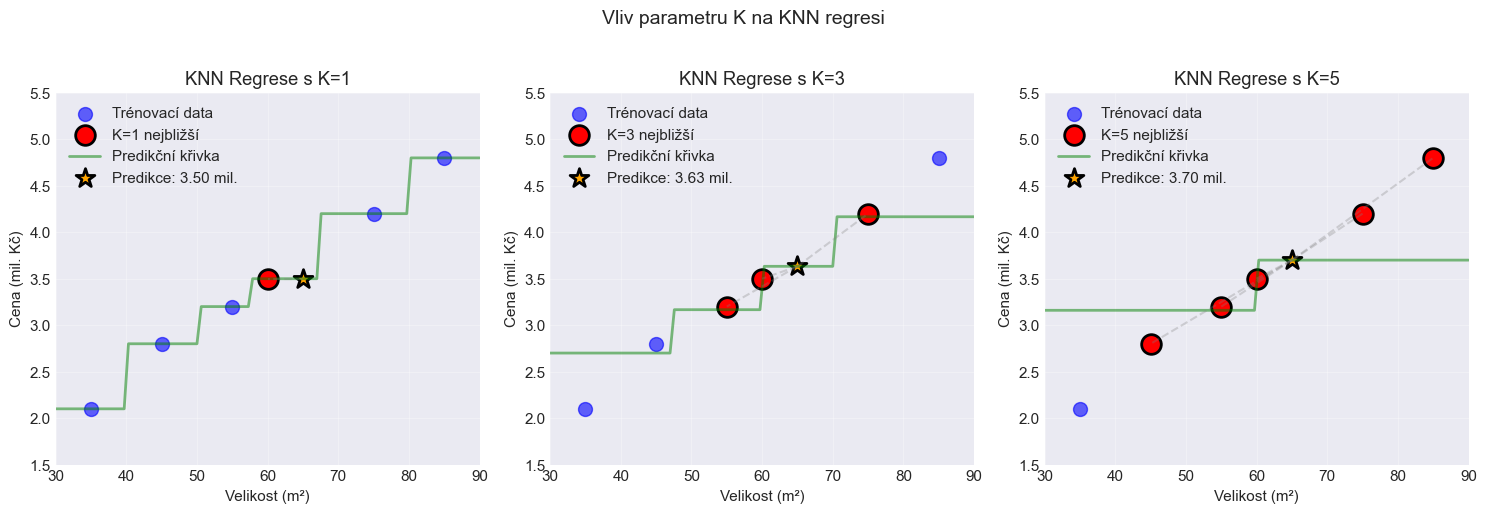

In [2]:
# Data bytů pro regresi
velikosti = np.array([35, 45, 55, 60, 75, 85])
ceny = np.array([2.1, 2.8, 3.2, 3.5, 4.2, 4.8])

# Nový byt
novy_byt = 65

# Funkce pro KNN regresi
def knn_regrese(x_train, y_train, x_new, k, weighted=False):
    """Vypočítá KNN regresi pro nový bod"""
    # Vzdálenosti
    distances = np.abs(x_train - x_new)
    
    # Indexy K nejbližších
    k_nearest_idx = np.argsort(distances)[:k]
    
    if weighted:
        # Vážený průměr
        weights = 1 / (distances[k_nearest_idx] + 0.001)  # +0.001 aby nedělili nulou
        prediction = np.sum(weights * y_train[k_nearest_idx]) / np.sum(weights)
    else:
        # Prostý průměr
        prediction = np.mean(y_train[k_nearest_idx])
    
    return prediction, k_nearest_idx

# Vizualizace pro různé K
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
k_values = [1, 3, 5]

for ax, k in zip(axes, k_values):
    # Predikce
    pred_prosty, neighbors = knn_regrese(velikosti, ceny, novy_byt, k, weighted=False)
    pred_vazeny, _ = knn_regrese(velikosti, ceny, novy_byt, k, weighted=True)
    
    # Vytvoření predikční křivky
    x_range = np.linspace(30, 90, 100)
    y_pred = [knn_regrese(velikosti, ceny, x, k, weighted=False)[0] for x in x_range]
    
    # Graf
    ax.scatter(velikosti, ceny, s=100, c='blue', alpha=0.6, label='Trénovací data')
    ax.scatter(velikosti[neighbors], ceny[neighbors], s=200, c='red', 
              edgecolor='black', linewidth=2, label=f'K={k} nejbližší')
    ax.plot(x_range, y_pred, 'g-', alpha=0.5, linewidth=2, label='Predikční křivka')
    ax.scatter(novy_byt, pred_prosty, s=200, c='orange', marker='*', 
              edgecolor='black', linewidth=2, label=f'Predikce: {pred_prosty:.2f} mil.')
    
    # Spojnice k sousedům
    for idx in neighbors:
        ax.plot([novy_byt, velikosti[idx]], [pred_prosty, ceny[idx]], 
               'gray', alpha=0.3, linestyle='--')
    
    ax.set_xlabel('Velikost (m²)')
    ax.set_ylabel('Cena (mil. Kč)')
    ax.set_title(f'KNN Regrese s K={k}')
    ax.legend(loc='upper left')
    ax.grid(True, alpha=0.3)
    ax.set_xlim(30, 90)
    ax.set_ylim(1.5, 5.5)

plt.suptitle('Vliv parametru K na KNN regresi', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

## Vizualizace vlivu K na rozhodovací hranici

Nyní vytvoříme syntetická data pro klasifikaci a ukážeme, jak se mění rozhodovací hranice s různými hodnotami K:

Počet vzorků v X: 60
Počet labelů v y: 60
Třída 0: 30 vzorků
Třída 1: 30 vzorků


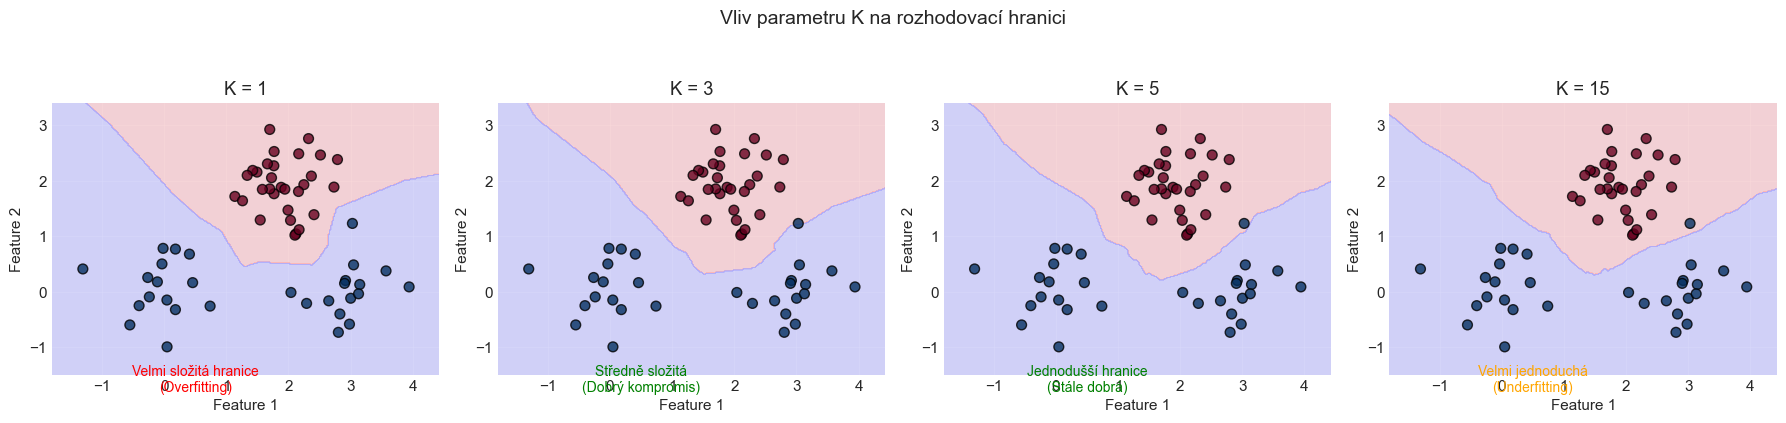

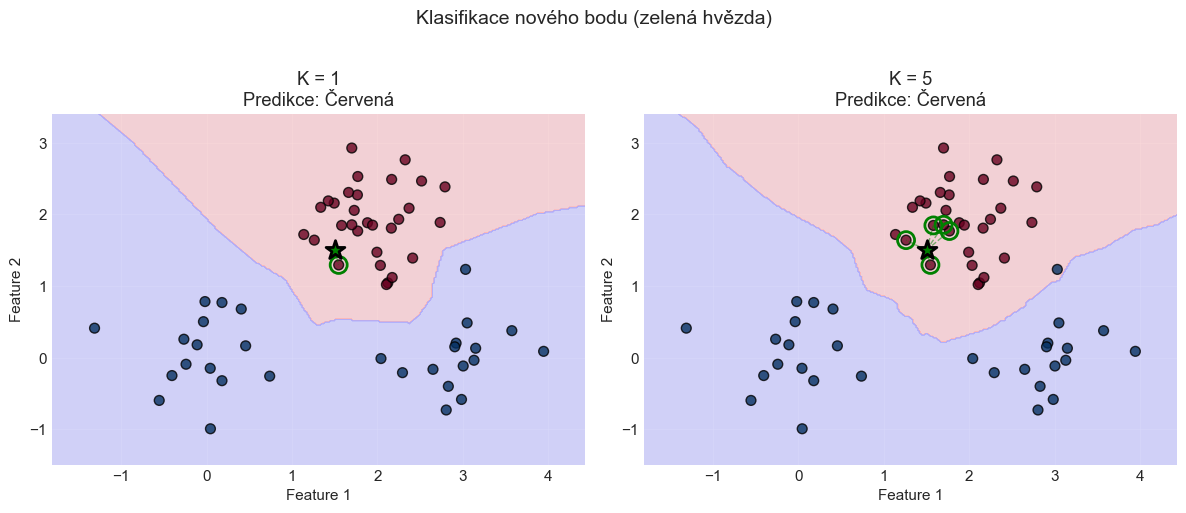


--- Alternativní generování dat ---


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Generování syntetických dat pro 2 třídy
np.random.seed(42)  # Pro reprodukovatelnost
n_samples = 60  # Použijeme číslo dělitelné 4

# Třída 0 (červená) - polovina vzorků
n_class0 = n_samples // 2  # 30 vzorků
X_class0 = np.random.randn(n_class0, 2) * 0.5 + [2, 2]
y_class0 = np.zeros(n_class0)

# Třída 1 (modrá) - dvě skupiny, každá čtvrtina vzorků
n_class1_part = n_samples // 4  # 15 vzorků každá část
X_class1_1 = np.random.randn(n_class1_part, 2) * 0.5 + [0, 0]
X_class1_2 = np.random.randn(n_class1_part, 2) * 0.5 + [3, 0]
X_class1 = np.vstack([X_class1_1, X_class1_2])
y_class1 = np.ones(n_class1_part * 2)  # 30 vzorků celkem

# Spojení dat
X = np.vstack([X_class0, X_class1])
y = np.hstack([y_class0, y_class1])

# Kontrola konzistence
print(f"Počet vzorků v X: {len(X)}")
print(f"Počet labelů v y: {len(y)}")
print(f"Třída 0: {np.sum(y == 0)} vzorků")
print(f"Třída 1: {np.sum(y == 1)} vzorků")

# Funkce pro KNN klasifikaci
def knn_classify(X_train, y_train, x_new, k):
    """KNN klasifikace pro jeden bod"""
    distances = np.sqrt(np.sum((X_train - x_new)**2, axis=1))
    k_nearest_idx = np.argsort(distances)[:k]
    k_nearest_labels = y_train[k_nearest_idx]
    
    # Hlasování
    unique, counts = np.unique(k_nearest_labels, return_counts=True)
    return unique[np.argmax(counts)]

# Vytvoření rozhodovacích hranic
def plot_decision_boundary(X_data, y_labels, k, ax):
    """Vykreslí rozhodovací hranici pro KNN"""
    h = 0.02  # krok v mřížce
    
    # Vytvoření mřížky bodů
    x_min, x_max = X_data[:, 0].min() - 0.5, X_data[:, 0].max() + 0.5
    y_min, y_max = X_data[:, 1].min() - 0.5, X_data[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # Predikce pro každý bod mřížky
    Z = np.array([knn_classify(X_data, y_labels, [xi, yi], k) 
                  for xi, yi in zip(xx.ravel(), yy.ravel())])
    Z = Z.reshape(xx.shape)
    
    # Vykreslení
    cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
    ax.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.4)
    
    # Vykreslení bodů
    scatter = ax.scatter(X_data[:, 0], X_data[:, 1], c=y_labels, cmap='RdBu', 
                        edgecolor='black', s=50, alpha=0.8)
    
    return scatter

# Vizualizace pro různé hodnoty K
fig, axes = plt.subplots(1, 4, figsize=(18, 4))
k_values = [1, 3, 5, 15]

for ax, k in zip(axes, k_values):
    plot_decision_boundary(X, y, k, ax)
    
    # Popisky
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_title(f'K = {k}')
    ax.grid(True, alpha=0.3)
    
    # Charakteristika hranice
    if k == 1:
        ax.text(0.5, -1.8, 'Velmi složitá hranice\n(Overfitting)', 
               ha='center', fontsize=10, color='red')
    elif k == 3:
        ax.text(0.5, -1.8, 'Středně složitá\n(Dobrý kompromis)', 
               ha='center', fontsize=10, color='green')
    elif k == 5:
        ax.text(0.5, -1.8, 'Jednodušší hranice\n(Stále dobrá)', 
               ha='center', fontsize=10, color='green')
    else:
        ax.text(0.5, -1.8, 'Velmi jednoduchá\n(Underfitting)', 
               ha='center', fontsize=10, color='orange')

plt.suptitle('Vliv parametru K na rozhodovací hranici', fontsize=14, y=1.05)
plt.tight_layout()
plt.show()

# Dodatečná vizualizace - ukázka klasifikace nového bodu
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Testovací bod
test_point = np.array([1.5, 1.5])

for idx, k in enumerate([1, 5]):
    ax = axes[idx]
    
    # Vykreslení rozhodovací hranice
    plot_decision_boundary(X, y, k, ax)
    
    # Zvýraznění testovacího bodu
    ax.scatter(test_point[0], test_point[1], c='green', s=200, 
              marker='*', edgecolor='black', linewidth=2, zorder=5)
    
    # Najdeme K nejbližších sousedů
    distances = np.sqrt(np.sum((X - test_point)**2, axis=1))
    k_nearest_idx = np.argsort(distances)[:k]
    
    # Vykreslení spojnic k nejbližším sousedům
    for idx in k_nearest_idx:
        ax.plot([test_point[0], X[idx, 0]], 
               [test_point[1], X[idx, 1]], 
               'g--', alpha=0.5, linewidth=1)
    
    # Zvýraznění nejbližších sousedů
    ax.scatter(X[k_nearest_idx, 0], X[k_nearest_idx, 1], 
              s=150, facecolors='none', edgecolors='green', linewidth=2)
    
    # Predikce
    prediction = knn_classify(X, y, test_point, k)
    pred_class = 'Modrá' if prediction == 1 else 'Červená'
    
    ax.set_title(f'K = {k}\nPredikce: {pred_class}')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.grid(True, alpha=0.3)

plt.suptitle('Klasifikace nového bodu (zelená hvězda)', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

# Alternativní způsob generování dat s přesným počtem vzorků
print("\n--- Alternativní generování dat ---")
n_total = 50

# Rozdělit přesně na poloviny
n_class0 = n_total // 2  # 25
n_class1 = n_total - n_class0  # 25

# Třída 0
X_class0_alt = np.random.randn(n_class0, 2) * 0.5 + [2, 2]
y_class0_alt = np.zeros(n_class0)

# Třída 1 - rozdělit na dvě části
n_part1 = n_class1 // 2  # 12
n_part2 = n_class1 - n_part1  # 13
X_class1_1_alt = np.random.randn(n_part1, 2) * 0.5 + [0, 0]
X_class1_2_alt = np.random.randn(n_part2, 2) * 0.5 + [3, 0]
X_class1_alt = np.vstack([X_class1_1_alt, X_class1_2_alt])
y_class1_alt = np.ones(n_class1)

# Spojení
X_alt = np.vstack([X_class0_alt, X_class1_alt])
y_alt = np.hstack([y_class0_alt, y_class1_alt])


## Srovnání prostého a váženého průměru

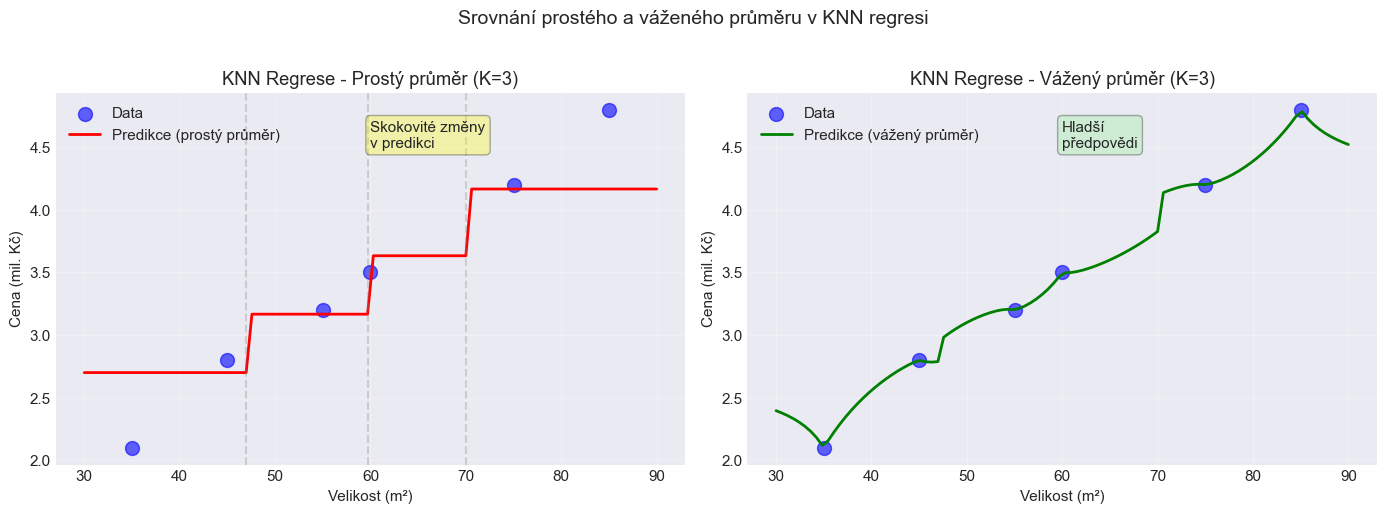

In [4]:
# Porovnání prostého a váženého průměru
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Rozsah pro predikci
x_range = np.linspace(30, 90, 100)

# K=3 pro oba typy
k = 3

# Prostý průměr
y_simple = [knn_regrese(velikosti, ceny, x, k, weighted=False)[0] for x in x_range]
ax1.scatter(velikosti, ceny, s=100, c='blue', alpha=0.6, label='Data')
ax1.plot(x_range, y_simple, 'r-', linewidth=2, label='Predikce (prostý průměr)')
ax1.set_xlabel('Velikost (m²)')
ax1.set_ylabel('Cena (mil. Kč)')
ax1.set_title(f'KNN Regrese - Prostý průměr (K={k})')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Ukázka skoků v predikci
for i in range(len(y_simple)-1):
    if abs(y_simple[i] - y_simple[i+1]) > 0.01:
        ax1.axvline(x=x_range[i], color='gray', linestyle='--', alpha=0.3)

# Vážený průměr
y_weighted = [knn_regrese(velikosti, ceny, x, k, weighted=True)[0] for x in x_range]
ax2.scatter(velikosti, ceny, s=100, c='blue', alpha=0.6, label='Data')
ax2.plot(x_range, y_weighted, 'g-', linewidth=2, label='Predikce (vážený průměr)')
ax2.set_xlabel('Velikost (m²)')
ax2.set_ylabel('Cena (mil. Kč)')
ax2.set_title(f'KNN Regrese - Vážený průměr (K={k})')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Anotace rozdílů
ax1.text(60, 4.5, 'Skokovité změny\nv predikci', 
        bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.3))
ax2.text(60, 4.5, 'Hladší\npředpovědi', 
        bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.3))

plt.suptitle('Srovnání prostého a váženého průměru v KNN regresi', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()